In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore")

# Реализация бинарной логистической регрессии

In [2]:
random_seed = 43
n_features = 2
n_objects = 200
batch_size = 10
num_steps = 100

np.random.seed(random_seed)

Генерация и визуализация данных


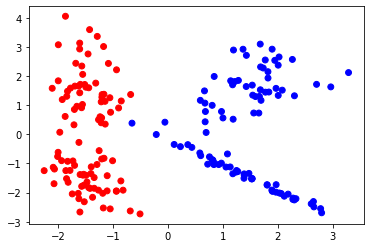

In [3]:
import sklearn.datasets as dt
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","blue"])
X, Y = dt.make_classification(n_samples=n_objects,
                                 n_features=n_features,
                                 n_repeated = 0,
                                 class_sep=1.5,
                                 n_redundant=0,
                                 random_state=43)

scatter_plot = plt.scatter(X[:,0],
                                  X[:,1],
                                  c=Y,
                                  vmin=min(Y),
                                  vmax=max(Y),
                                  s=35,
                                  cmap=color_map_discrete)
plt.show()

In [4]:
from sklearn.base import BaseEstimator, RegressorMixin

def sigmoid(x):
      return 1 / (1 + np.exp(-x))

class LogReg (BaseEstimator, RegressorMixin): 
    def __init__(self, batch_size=20, num_steps=400, lr=0.01, coeff = 0.1):
        self.batch_size = batch_size
        self.num_steps = num_steps
        self.lr = lr
        self.coeff = coeff

    def fit(self, X, Y):
        w = np.random.randn(X.shape[1])[:, None]

        for i in range(self.num_steps):
            w -= self.lr * np.dot(X.T, sigmoid(np.dot(X, w)) - Y.reshape(len(Y), 1)) / self.batch_size
        
        self.w = w
        return self

    def predict(self, X):
        ans = X @ self.w 
        ans [ans > 0] = int(1)
        ans [ans <= 0] = int(0)
        return ans

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, Y)
scaler = StandardScaler()
scaler.fit(x_train)
x_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [7]:
own_model = LogReg().fit(x_scaled, y_train)
y_pred = own_model.predict(x_test_scaled)
own_acc = accuracy_score(y_test, y_pred)

sklearn_model = LogisticRegression().fit(x_scaled, y_train)
y_pred = sklearn_model.predict(x_test_scaled)

sklearn_acc = accuracy_score(y_test, y_pred)


print('Accuracy in own LogReg model:', own_acc)
print('Accuracy in sklearn LogReg model:', sklearn_acc)

Accuracy in own LogReg model: 0.98
Accuracy in sklearn LogReg model: 0.98
